In [42]:
import numpy as np
import pandas as pd

In [43]:
data = pd.read_csv("result.csv")
data.columns = data.columns.map(lambda x: x.lstrip(' ').rstrip(" "))
data = data.dropna()
data.N.astype(int)
data["AvgPerf(FLOPs)"].astype(np.longdouble)

funcname = data.func.unique()

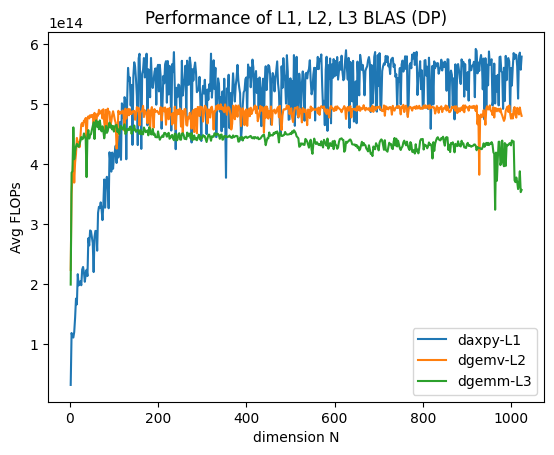

In [44]:
import matplotlib.pyplot as plt

i = 0
for func in funcname:
    perf = data.groupby("func").get_group(func)
    if func != "unroll":
        i += 1
        plt.plot(perf["N"], perf["AvgPerf(FLOPs)"], label=func + f"-L{i}")
plt.legend()
plt.xlabel("dimension N")
plt.ylabel("Avg FLOPs")
plt.title("Performance of L1, L2, L3 BLAS (DP)")
plt.show()

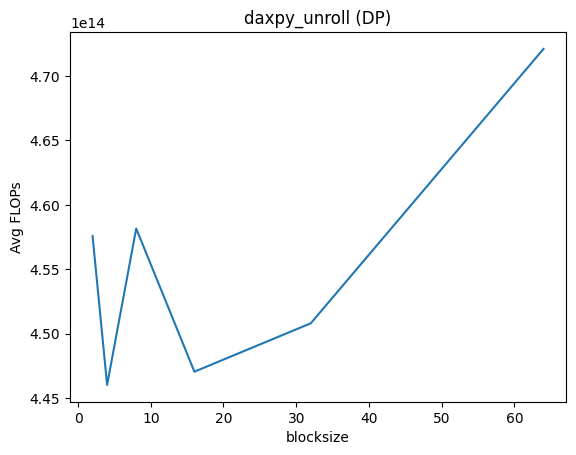

In [45]:
perf = data.groupby("func").get_group("unroll")
plt.plot(perf.blocksize, perf["AvgPerf(FLOPs)"])
plt.xlabel("blocksize")
plt.ylabel("Avg FLOPs")
plt.title("daxpy_unroll (DP)")
plt.show()

In [46]:
dfs = []

funcname = ["axpy", "gemv", "gemm"]
for func in funcname:
    data = pd.read_csv(func + ".csv")
    data.columns = data.columns.map(lambda x: x.lstrip(' ').rstrip(" "))
    data = data.dropna()
    data.N.astype(int)
    data["AvgPerf(FLOPs)"].astype(np.longdouble)

    dfs.append(data)


Text(0.5, 1.0, 'Performance of L1, L2, L3 BLAS (SP)')

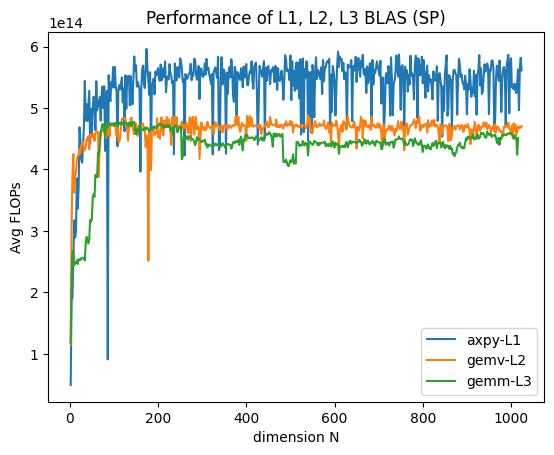

In [47]:
for i, perf in enumerate(dfs):
    plt.plot(perf["N"], perf["AvgPerf(FLOPs)"], label=funcname[i] + f"-L{i+1}")
plt.legend()
plt.xlabel("dimension N")
plt.ylabel("Avg FLOPs")
plt.title("Performance of L1, L2, L3 BLAS (SP)")
